## Introduction

To know which factor may affect the student's performance, we classify the score into couple of ranks, and figure out which feature affects the score more significant. The independent variables are follow:

1. gender : sex of students
2. race/ethnicity : ethnicity of students
3. parental level of education : parents' final education
4. lunch : having lunch before test (normal or abnormal)
5. test preparation course : complete or not complete before test

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Let's see how many datasets in this topic.

In [2]:
os.listdir(".")

['.config', 'exam_results.csv', 'sample_data']

Only one! Take a look at the dataset.


In [3]:
filename = "exam_results.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Some column names are too long, rename the column names to be simpler. 

In [4]:
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Seems clearly. Check the data type.

In [6]:
score_df.groupby("gender")[list(score_df.columns[-3:])[0]].mean()

gender
female    63.633205
male      68.728216
Name: math, dtype: float64

In [7]:
score_df.groupby("gender")[list(score_df.columns[-3:])[1]].mean()

gender
female    72.608108
male      65.473029
Name: reading, dtype: float64

In [8]:
score_df.groupby("gender")[list(score_df.columns[-3:])[2]].mean()

gender
female    72.467181
male      63.311203
Name: writing, dtype: float64

In [5]:
score_df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

Plotting the average scores per gender. Use a Matplotlib Barplot

Plot the average scores per category of "lunch" and "pre". Use a seaborn boxplot chart.

AttributeError: ignored

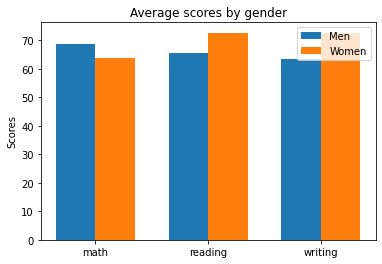

In [13]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['math', 'reading', 'writing']

men_means = [68.728216,65.473029, 63.311203]
women_means = [63.633205, 72.608108, 72.467181]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Average scores by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [14]:
score_df.groupby("lunch")[list(score_df.columns[-3:])[0]].mean()

lunch
free/reduced    58.921127
standard        70.034109
Name: math, dtype: float64

In [15]:
score_df.groupby("lunch")[list(score_df.columns[-3:])[1]].mean()

lunch
free/reduced    64.653521
standard        71.654264
Name: reading, dtype: float64

In [16]:
score_df.groupby("lunch")[list(score_df.columns[-3:])[2]].mean()

lunch
free/reduced    63.022535
standard        70.823256
Name: writing, dtype: float64

                   math    reading    writing
lunch                                        
free/reduced  58.921127  64.653521  63.022535
standard      70.034109  71.654264  70.823256


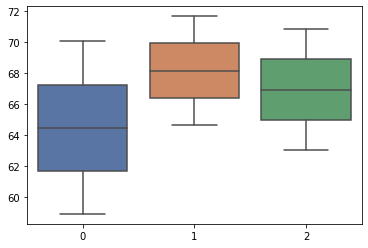

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

labels = 3
Fmean = (58.921127,64.653521,63.022535)
Smean = (70.034109, 71.654264, 70.823256)

fig, ax = plt.subplots()
index = np.arange(labels)


averageScore = score_df.groupby("lunch").mean()
print(averageScore)
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = averageScore.to_numpy())


In [27]:
score_df.groupby("pre")[list(score_df.columns[-3:])[0]].mean()

pre
completed    69.695531
none         64.077882
Name: math, dtype: float64

In [25]:
score_df.groupby("pre")[list(score_df.columns[-3:])[1]].mean()

pre
completed    73.893855
none         66.534268
Name: reading, dtype: float64

In [26]:
score_df.groupby("pre")[list(score_df.columns[-3:])[2]].mean()

pre
completed    74.418994
none         64.504673
Name: writing, dtype: float64

                math    reading    writing
pre                                       
completed  69.695531  73.893855  74.418994
none       64.077882  66.534268  64.504673


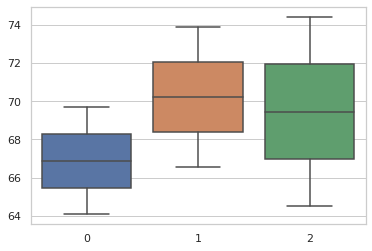

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline


labels = 3
completedM = (69.695531,73.893855,74.418994)
noM = (64.0778829, 66.534268, 64.504673)

fig, ax = plt.subplots()
index = np.arange(labels)


averageScore = score_df.groupby("pre").mean()
print(averageScore)
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = averageScore.to_numpy())